**author**: lukethompson@gmail.com<br>
**date**: 23 Nov 2016<br>
**language**: Python 3.5<br>
**conda enviroment**: emp-py3<br>
**license**: unlicensed<br>

## sequence_length.ipynb

Distribution of study sequence lengths after split_libraries_fastq.py and removal of any sequences with adapters.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
files = !ls /path/to/metadata-sequences/*_filtered_seqs.length.txt

In [4]:
df = pd.DataFrame()
for path in files:
    df_single = pd.read_csv(path, header=None)
    x = re.match('/path/to/metadata-sequences/([0-9]*)_filtered_seqs.length.txt', path)
    study = x.groups()[0]
    df_single.columns = [study]
    df = pd.concat([df, df_single.describe()], axis=1)

In [5]:
df.to_csv('/path/to/metadata-sequences/length_filtered_seqs_adaptor_cleanup.csv', index_label='study_id')

In [6]:
df

,1001,1024,1030,1031,1033,1034,1035,1036,1037,1038,...,895,905,910,925,933,940,945,958,963,990
count,428891.0,1748559.0,2.759098e+07,1.835733e+06,1.357128e+06,1.145258e+07,1.940081e+07,1.356474e+07,4.394206e+06,3.808519e+06,...,257569.000000,4.646697e+06,4.108408e+06,6.288561e+06,6.108392e+07,9.699086e+06,5.914723e+07,4.507585e+06,1.301667e+07,9.736478e+07
mean,151.0,151.0,9.710053e+01,9.706472e+01,9.744952e+01,9.850946e+01,9.646700e+01,9.685766e+01,9.703890e+01,9.694813e+01,...,147.937799,1.489229e+02,1.499534e+02,8.808240e+01,9.803802e+01,9.934798e+01,1.471374e+02,1.483690e+02,9.948682e+01,1.485324e+02
std,0.0,0.0,5.201202e+00,5.172705e+00,4.882912e+00,4.014423e+00,5.424851e+00,5.408512e+00,5.265942e+00,5.305672e+00,...,7.176171,6.281878e+00,4.341778e+00,4.760352e+00,5.268941e+00,2.485887e+00,6.175203e+00,7.735735e+00,2.191143e+00,6.283632e+00
min,151.0,151.0,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,...,114.000000,1.140000e+02,1.140000e+02,6.900000e+01,7.600000e+01,7.600000e+01,1.140000e+02,1.140000e+02,7.600000e+01,1.140000e+02
25%,151.0,151.0,9.500000e+01,9.500000e+01,9.600000e+01,1.000000e+02,9.400000e+01,9.500000e+01,9.500000e+01,9.500000e+01,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02
50%,151.0,151.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02
75%,151.0,151.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02
max,151.0,151.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02


In [8]:
df.loc['50%'].round().value_counts()

100.0    48
151.0    29
150.0     6
141.0     2
138.0     2
90.0      2
145.0     2
137.0     1
143.0     1
140.0     1
132.0     1
101.0     1
131.0     1
Name: 50%, dtype: int64

In [10]:
df.loc['50%'].sort_values().head()

925      90.0
1521     90.0
1579    100.0
810     100.0
1580    100.0
Name: 50%, dtype: float64

sequence length after adaptor clean-up -- 97 EMP studies


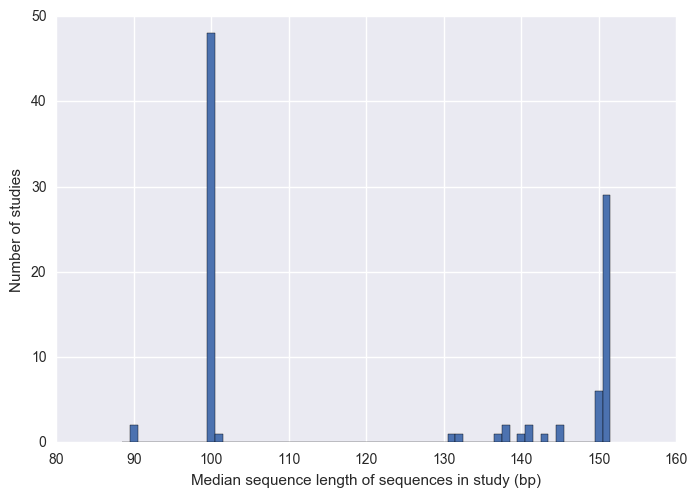

In [11]:
print('sequence length after adaptor clean-up -- %s EMP studies' % df.shape[1])
plt.hist(df.loc['50%'].round(), bins=np.arange(df.loc['mean'].round().min()-0.5,df.loc['mean'].round().max()+1.5,1))
plt.xlabel('Median sequence length of sequences in study (bp)')
plt.ylabel('Number of studies')
plt.savefig('/path/to/metadata-sequences/median_length_filtered_seqs_adaptor_cleanup.pdf')